**LOADING THE DATASET AND ANALYZING IT**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/general_amps.xlsx', sheet_name='general_amps')
print(df.head()) #prints the first 5 rows of the dataset

     DRAMP_ID                                           Sequence  \
0  DRAMP00005                     SLGPAIKATRQVCPKATRFVTVSCKKSDCQ   
1  DRAMP00017                           VTSWSLCTPGCTSPGGGSNCSFCC   
2  DRAMP00032                           GNGVLKTISHECNMNTWQFLFTCC   
3  DRAMP00063                              SSSGWLCTLTIECGTIICACR   
4  DRAMP00068  MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...   

   Sequence_Length                                    Name  \
0               30              Epicidin 280 (Bacteriocin)   
1               24        Microbisporicin A1 (Bacteriocin)   
2               24      Ruminococcin A (RumA; Bacteriocin)   
3               21  Lantibiotic michiganin-A (Bacteriocin)   
4               51              Aureocin A53 (Bacteriocin)   

                                    Swiss_Prot_Entry  \
0                                             O54220   
1                                     No entry found   
2  P83674, P83676, P83677, Q8VLK0, Q9K381, P83675.

In [ ]:
print(df.info())         # Check data types and non-null counts
print(df.describe())     # Get a summary of numerical features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034 entries, 0 to 6033
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DRAMP_ID                 6034 non-null   object
 1   Sequence                 6032 non-null   object
 2   Sequence_Length          6034 non-null   int64 
 3   Name                     6034 non-null   object
 4   Swiss_Prot_Entry         6034 non-null   object
 5   Family                   5990 non-null   object
 6   Gene                     5900 non-null   object
 7   Source                   6034 non-null   object
 8   Activity                 6034 non-null   object
 9   Protein_existence        5777 non-null   object
 10  Structure                6033 non-null   object
 11  Structure_Description    6034 non-null   object
 12  PDB_ID                   315 non-null    object
 13  Comments                 6034 non-null   object
 14  Target_Organism          6034 non-null  

**Dropping Columns which are not required**

In [ ]:
# Dropping unnecessary columns
columns_to_drop = [
    'DRAMP_ID',
    'Swiss_Prot_Entry',
    'Pubmed_ID',
    'Name',
    'Comments',
    'Reference',
    'Author',
    'Title',
    'PDB_ID',
    'Other_Modifications',
    'N-terminal_Modification',
    'C-terminal_Modification'
]

# Drop columns
df.drop(columns=columns_to_drop, inplace=True)

# Check the DataFrame after dropping columns
print("Remaining columns after dropping unnecessary ones:\n", df.columns)


Remaining columns after dropping unnecessary ones:
 Index(['Sequence', 'Sequence_Length', 'Family', 'Gene', 'Source', 'Activity',
       'Protein_existence', 'Structure', 'Structure_Description',
       'Target_Organism', 'Hemolytic_activity', 'Linear/Cyclic/Branched',
       'Stereochemistry', 'Cytotoxicity', 'Binding_Traget'],
      dtype='object')


In [ ]:
# Check the actual column names
print("Current columns in the DataFrame:\n", df.columns.tolist())

print(df.info())         # Check data types and non-null counts
print(df.describe())     # Get a summary of numerical features


Current columns in the DataFrame:
 ['Sequence', 'Sequence_Length', 'Family', 'Gene', 'Source', 'Activity', 'Protein_existence', 'Structure', 'Structure_Description', 'Target_Organism', 'Hemolytic_activity', 'Linear/Cyclic/Branched', 'Stereochemistry', 'Cytotoxicity', 'Binding_Traget']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034 entries, 0 to 6033
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sequence                6032 non-null   object
 1   Sequence_Length         6034 non-null   int64 
 2   Family                  5990 non-null   object
 3   Gene                    5900 non-null   object
 4   Source                  6034 non-null   object
 5   Activity                6034 non-null   object
 6   Protein_existence       5777 non-null   object
 7   Structure               6033 non-null   object
 8   Structure_Description   6034 non-null   object
 9   Target_Organism         6034 n

In [ ]:
# Drop rows with missing values in the 'Sequence' column
df.dropna(subset=['Sequence'], inplace=True)

# Fill missing values in categorical columns with the most frequent value (mode)
categorical_columns = ['Family', 'Gene', 'Protein_existence', 'Structure',
                       'Hemolytic_activity', 'Linear/Cyclic/Branched', 'Stereochemistry',
                       'Cytotoxicity', 'Binding_Traget']

# Fill categorical columns with mode (most frequent value)
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Check for remaining missing values to confirm
missing_values = df.isnull().sum()

# Display columns with missing values if any
print(missing_values[missing_values > 0])

# Final check of the dataset
print(df.info())


Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
Index: 6032 entries, 0 to 6033
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sequence                6032 non-null   object
 1   Sequence_Length         6032 non-null   int64 
 2   Family                  6032 non-null   object
 3   Gene                    6032 non-null   object
 4   Source                  6032 non-null   object
 5   Activity                6032 non-null   object
 6   Protein_existence       6032 non-null   object
 7   Structure               6032 non-null   object
 8   Structure_Description   6032 non-null   object
 9   Target_Organism         6032 non-null   object
 10  Hemolytic_activity      6032 non-null   object
 11  Linear/Cyclic/Branched  6032 non-null   object
 12  Stereochemistry         6032 non-null   object
 13  Cytotoxicity            6032 non-null   object
 14  Binding_Traget          6032 non-nul

In [ ]:
# Get the count of each unique entry in the 'Activity' column
activity_counts = df['Activity'].value_counts()

# Display the counts
print(activity_counts)


Activity
Antimicrobial, Antibacterial, Anti-Gram+, Anti-Gram-                1124
Antimicrobial, Antibacterial                                         766
Antimicrobial, Antibacterial, Anti-Gram+, Anti-Gram-, Antifungal     753
Antimicrobial                                                        563
Antimicrobial, Antifungal                                            542
                                                                    ... 
Antiviral, Cytotoxic, Antimicrobial                                    1
Antimicrobial, Antibacterial, Antibiotic                               1
Anti-cancer, Antiviral                                                 1
Antimicrobial, Anti-HIV, Anti-cancer                                   1
Antimicrobial, Antibacterial, Anti-Gram+, Antilisterial                1
Name: count, Length: 176, dtype: int64


**PREPROCESSING THE DATASET**

In [ ]:
# Step 1: Define a function to clean strings
def clean_string(s):
    if isinstance(s, str):  # Check if the value is a string
        return ' '.join(s.split()).lower()  # Remove extra spaces and convert to lowercase
    return s  # Return the value as is if it's not a string

# Step 2: Apply the function to all object-type columns in the DataFrame except for 'Sequence'
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Sequence':  # Exclude the 'Sequence' column
        df[column] = df[column].apply(clean_string)

# Step 3: Verify the transformation
print(df.head())


                                            Sequence  Sequence_Length  \
0                     SLGPAIKATRQVCPKATRFVTVSCKKSDCQ               30   
1                           VTSWSLCTPGCTSPGGGSNCSFCC               24   
2                           GNGVLKTISHECNMNTWQFLFTCC               24   
3                              SSSGWLCTLTIECGTIICACR               21   
4  MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...               51   

                                              Family                 Gene  \
0  belongs to the lantibiotic family (class i bac...                 ecia   
1  belongs to the lantibiotic family (class i bac...            not found   
2  belongs to the type a lantibiotic family (clas...  ruma1 and ruma2 and   
3  belongs to the type b lantibiotic family (clas...                 mica   
4                belongs to the class ii bacteriocin                 auca   

                                              Source  \
0  staphylococcus epidermidis bn 280 (gram

In [ ]:
# Assuming df is your DataFrame and already loaded
# Define a function to categorize activities
def categorize_activity(activity):
    # Convert to lower case and check for keywords
    activity = activity.lower()
    antimicrobial_keywords = ['antimicrobial']

    # Check if any antimicrobial keyword is in the activity
    if any(keyword in activity for keyword in antimicrobial_keywords):
        return 'Antimicrobial'
    else:
        return 'Non-Antimicrobial'

# Apply the function to the Activity column
df['Activity'] = df['Activity'].apply(categorize_activity)

# Display the updated DataFrame
print(df.head())


                                            Sequence  Sequence_Length  \
0                     SLGPAIKATRQVCPKATRFVTVSCKKSDCQ               30   
1                           VTSWSLCTPGCTSPGGGSNCSFCC               24   
2                           GNGVLKTISHECNMNTWQFLFTCC               24   
3                              SSSGWLCTLTIECGTIICACR               21   
4  MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...               51   

                                              Family                 Gene  \
0  belongs to the lantibiotic family (class i bac...                 ecia   
1  belongs to the lantibiotic family (class i bac...            not found   
2  belongs to the type a lantibiotic family (clas...  ruma1 and ruma2 and   
3  belongs to the type b lantibiotic family (clas...                 mica   
4                belongs to the class ii bacteriocin                 auca   

                                              Source       Activity  \
0  staphylococcus epidermid

**Getting the count of target variables in the 'Activity' column**

In [ ]:
print(df['Activity'].value_counts())

Activity
Antimicrobial        5625
Non-Antimicrobial     407
Name: count, dtype: int64


In [ ]:
print(df['Activity'].unique)

<bound method Series.unique of 0           Antimicrobial
1           Antimicrobial
2           Antimicrobial
3           Antimicrobial
4           Antimicrobial
              ...        
6029        Antimicrobial
6030        Antimicrobial
6031        Antimicrobial
6032        Antimicrobial
6033    Non-Antimicrobial
Name: Activity, Length: 6032, dtype: object>


**Checking the current columns in the dataset**

In [ ]:
print(df.columns)

Index(['Sequence', 'Sequence_Length', 'Family', 'Gene', 'Source', 'Activity',
       'Protein_existence', 'Structure', 'Structure_Description',
       'Target_Organism', 'Hemolytic_activity', 'Linear/Cyclic/Branched',
       'Stereochemistry', 'Cytotoxicity', 'Binding_Traget'],
      dtype='object')


In [ ]:
# Display the unique non-antimicrobial entries
non_antimicrobial_entries = df[df['Activity'] == 'Non-Antimicrobial']
print(non_antimicrobial_entries['Activity'].unique())

# Display a sample of non-antimicrobial entries
print(non_antimicrobial_entries.sample(10))  # Adjust the number to see more or fewer entries


['Non-Antimicrobial']
                                               Sequence  Sequence_Length  \
2727                            CCSCSCSTCTCTCTCASSAATKM               23   
3205               DHYNCVRSGGQCLYSACPIYTKIQGTCYHGKAKCCK               36   
4693  MALALLGLTIKPEHVPEGTGKAVADVEALACDPAQCMRSCPFNPFL...               64   
2190  QKIPFKECYPACLVECKAGSKFPKYLKCPFTCTKECLQQPSPPSVS...               95   
2065                     GIPCGESCVYIPCLTSAVGCSCKSKVCYRN               30   
1617  AISCGQVSSALSPCISYARGNGAKPPVACCSGVKRLAGAAQSTADK...               90   
2579                                 GLFDVIKKVASVIGLASQ               18   
4668                             ANIVFDVESATTGTYSTFLTSF               22   
2106                    GIPCGESCVFIPCTVTALLGCSCKDKVCYKN               31   
2030                    GSIPCEGSCVFIPCISAIIGCSCSNKVCYKN               31   

                                                 Family       Gene  \
2727                 belongs to the class i bacteriocin  not found   
3

In [ ]:
# Count unique non-antimicrobial entries
unique_non_antimicrobials = df[df['Activity'] == 'Non-Antimicrobial']['Source'].unique()
print(f"Unique Non-Antimicrobial Sources: {len(unique_non_antimicrobials)}")
print(unique_non_antimicrobials)


Unique Non-Antimicrobial Sources: 155
['mus musculus' 'a marine streptomyces species' 'trichodesmium erythraeum'
 'streptomyces sp. ct34' 'streptomyces spp.'
 'streptomyces sp. (dsm 14996)' 'streptomyces roseosporus nrrl11379'
 'streptomyces coerulescens' 'myxococcus fulvus (gram-negative bacteria)'
 'bacillus phage spbeta (bacillus phage spbc2) (bacteriophage sp-beta)'
 'pisum sativum (garden pea)'
 'psalmopoeus cambridgei (trinidad chevron tarantula)' 'malania oleifera'
 'petunia hybrida (petunia)' 'morus alba (white mulberry)'
 'cucumis melo (muskmelon)' 'foeniculum vulgare (fennel)'
 'cucurbita pepo (vegetable marrow) (summer squash)'
 'gossypium hirsutum (upland cotton) (gossypium mexicanum)'
 'hordeum vulgare (barley)' 'nicotiana tabacum (common tobacco)'
 'ricinus communis (castor bean)' 'spinacia oleracea (spinach)'
 'sorghum bicolor (sorghum) (sorghum vulgare)' 'zea mays (maize)'
 'lycium barbarum (matrimony vine)'
 'arabidopsis thaliana (mouse-ear cress)' 'vigna unguiculata (

In [ ]:
print(df.head)

<bound method NDFrame.head of                                                Sequence  Sequence_Length  \
0                        SLGPAIKATRQVCPKATRFVTVSCKKSDCQ               30   
1                              VTSWSLCTPGCTSPGGGSNCSFCC               24   
2                              GNGVLKTISHECNMNTWQFLFTCC               24   
3                                 SSSGWLCTLTIECGTIICACR               21   
4     MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...               51   
...                                                 ...              ...   
6029               SLDQINVTFLDLEYEMKKLEEAIKKLEESYIDLKEL               36   
6030                ISGINASVVNIQKEIDRLNEVAKNLNESLIDLQEL               35   
6031                                        XxXVXAaXXXX               11   
6032                                           PxTXXLPX                8   
6033                     GLPTCGETCFGGTCNTPGCTCDPWPVCTHN               30   

                                                 Family  

**Checking for Null values**

In [ ]:
print(df.columns)


# Assuming your DataFrame is named 'df'
not_found_counts = df.apply(lambda x: (x == 'not found').sum())
print("The no of not found counts:")
# Display the counts
print(not_found_counts)


Index(['Sequence', 'Sequence_Length', 'Family', 'Gene', 'Source', 'Activity',
       'Protein_existence', 'Structure', 'Structure_Description',
       'Target_Organism', 'Hemolytic_activity', 'Linear/Cyclic/Branched',
       'Stereochemistry', 'Cytotoxicity', 'Binding_Traget'],
      dtype='object')
The no of not found counts:
Sequence                     0
Sequence_Length              0
Family                    3121
Gene                      4878
Source                      10
Activity                     0
Protein_existence         1049
Structure                 4276
Structure_Description     5416
Target_Organism              0
Hemolytic_activity           0
Linear/Cyclic/Branched       0
Stereochemistry              0
Cytotoxicity                23
Binding_Traget            5367
dtype: int64


**Dropping again unecessary columns, extracting features**

In [ ]:
# Dropping unnecessary columns
columns_to_drop = [
    'Binding_Traget',
    'Structure_Description',
    'Gene',
    'Family',
    'Structure',
    'Cytotoxicity'
]

# Drop columns
df.drop(columns=columns_to_drop, inplace=True)

# Check the DataFrame after dropping columns
print("Remaining columns after dropping unnecessary ones:\n", df.columns)


Remaining columns after dropping unnecessary ones:
 Index(['Sequence', 'Sequence_Length', 'Source', 'Activity',
       'Protein_existence', 'Target_Organism', 'Hemolytic_activity',
       'Linear/Cyclic/Branched', 'Stereochemistry'],
      dtype='object')


In [ ]:
# Assuming your DataFrame is named 'df'
missing_values_count = df.isnull().sum()

# Display the counts of missing values
print(missing_values_count)

print(df['Activity'].value_counts())

Sequence                  0
Sequence_Length           0
Source                    0
Activity                  0
Protein_existence         0
Target_Organism           0
Hemolytic_activity        0
Linear/Cyclic/Branched    0
Stereochemistry           0
dtype: int64
Activity
Antimicrobial        5625
Non-Antimicrobial     407
Name: count, dtype: int64


**SOME DATA ANALYSIS AND VISUALIZATION**

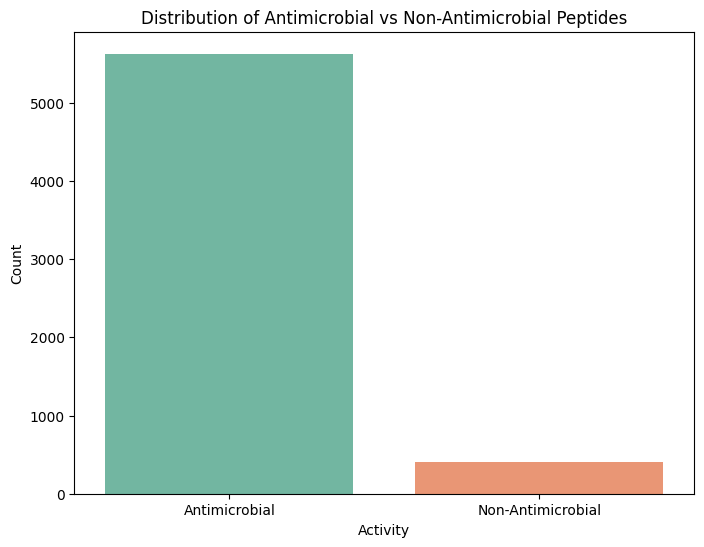

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of antimicrobial vs non-antimicrobial peptides
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Activity', hue='Activity', palette='Set2', legend=False)
plt.title('Distribution of Antimicrobial vs Non-Antimicrobial Peptides')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


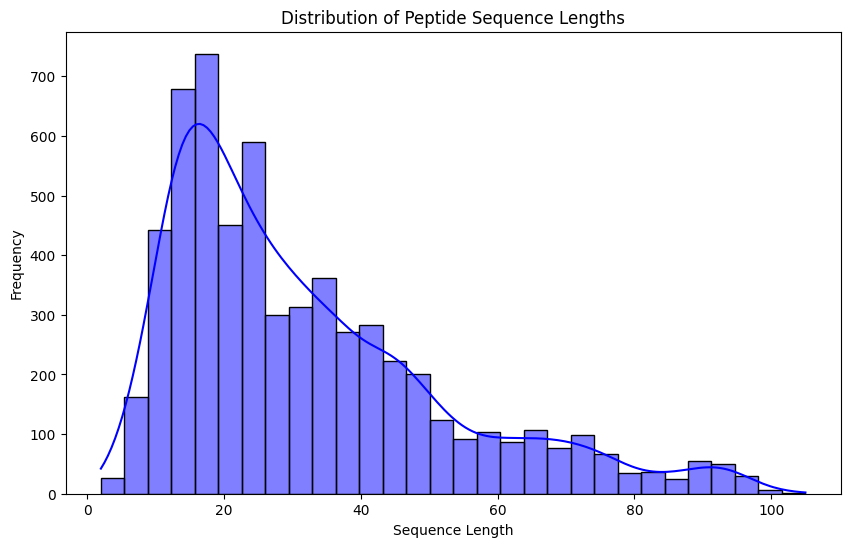

In [ ]:
# Plot the distribution of peptide sequence lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Sequence_Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Peptide Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


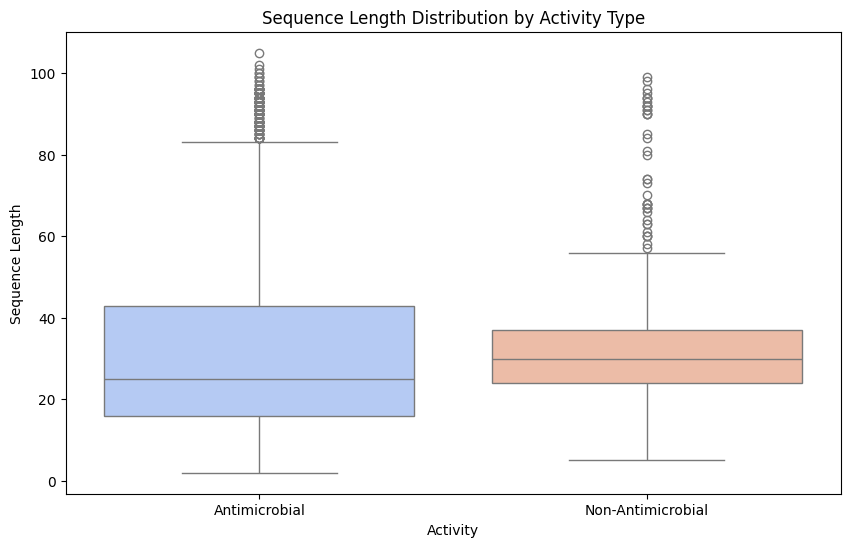

In [60]:
# Boxplot for sequence length based on activity type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Activity', y='Sequence_Length', hue='Activity', palette='coolwarm', dodge=False)
plt.title('Sequence Length Distribution by Activity Type')
plt.xlabel('Activity')
plt.ylabel('Sequence Length')
plt.legend([],[], frameon=False)  # Remove the legend as it's not needed
plt.show()


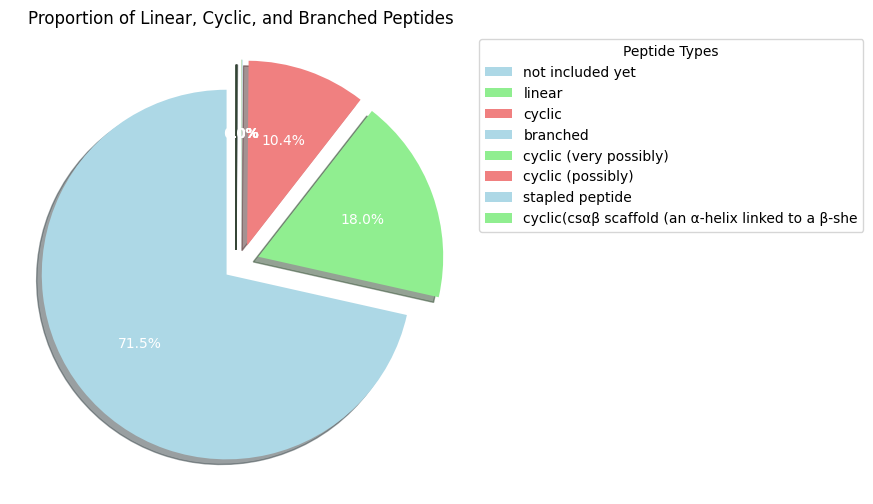

In [55]:
# Pie chart for Linear, Cyclic, and Branched Peptides using a legend
plt.figure(figsize=(8, 6))

# Get the value counts for Linear/Cyclic/Branched peptides
peptide_counts = df['Linear/Cyclic/Branched'].value_counts()

# Create an explode list with a length equal to the number of unique categories
explode = [0.1] * len(peptide_counts)  # Slightly separate all slices

# Define colors dynamically based on the number of unique categories
colors = ['lightblue', 'lightgreen', 'lightcoral'] * (len(peptide_counts) // 3 + 1)  # Ensure enough colors

# Create the pie chart
plt.pie(
    peptide_counts,
    autopct='%1.1f%%',          # Display percentages
    colors=colors[:len(peptide_counts)],  # Use the appropriate number of colors
    startangle=90,              # Start at 90 degrees to avoid overlap
    explode=explode,            # Slightly separate the slices
    shadow=True,                # Add shadow for better visibility
    textprops=dict(color="w")   # Set text color for better contrast
)

# Add a legend
plt.legend(peptide_counts.index, title="Peptide Types", loc="upper left", bbox_to_anchor=(1, 1))

plt.title('Proportion of Linear, Cyclic, and Branched Peptides')
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.show()


**Splitting the dataset and applying SMOTE technique to handle imbalances**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Sample DataFrame (replace this with your actual DataFrame)
# df = ...

# Prepare the features and target variable
X = df[['Sequence', 'Sequence_Length', 'Source', 'Protein_existence',
         'Target_Organism', 'Hemolytic_activity',
         'Linear/Cyclic/Branched', 'Stereochemistry']]
y = df['Activity']

# Convert 'Sequence' to k-mer representation
k = 3  # Change k for different lengths
vectorizer = CountVectorizer(analyzer='char', ngram_range=(k, k))
X_kmers = vectorizer.fit_transform(X['Sequence']).toarray()

# Create a DataFrame from k-mer features
kmers_df = pd.DataFrame(X_kmers, columns=vectorizer.get_feature_names_out())

# Combine k-mer features with other features
X_combined = pd.concat([kmers_df, X[['Sequence_Length', 'Source', 'Protein_existence',
                                       'Target_Organism', 'Hemolytic_activity',
                                       'Linear/Cyclic/Branched', 'Stereochemistry']].reset_index(drop=True)], axis=1)

# Encode categorical variables
X_encoded = pd.get_dummies(X_combined, columns=['Source', 'Protein_existence', 'Target_Organism',
                                                'Hemolytic_activity', 'Linear/Cyclic/Branched',
                                                'Stereochemistry'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now you can train your model on X_resampled and y_resampled


**Checking size of Dataset after SMOTE**

In [ ]:
# Check the sizes of the datasets after SMOTE
print(f'Size of X_train after SMOTE: {X_resampled.shape}')
print(f'Size of y_train after SMOTE: {y_resampled.shape}')
print(f'Size of X_test: {X_test.shape}')
print(f'Size of y_test: {y_test.shape}')


class_counts = y_train.value_counts()
print(class_counts)

Size of X_train after SMOTE: (8986, 14141)
Size of y_train after SMOTE: (8986,)
Size of X_test: (1207, 14141)
Size of y_test: (1207,)
Activity
Antimicrobial        4493
Non-Antimicrobial     332
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




**Balanced Datas for both the classes**

In [ ]:
print(y_resampled.value_counts())

Activity
Antimicrobial        4493
Non-Antimicrobial    4493
Name: count, dtype: int64


**Training the model and applying Ensemble Voting Classifier method**

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



# Standardize the feature set
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Initialize the base models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf_classifier = RandomForestClassifier(random_state=42)

# Create the Voting Classifier with weights
voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', log_reg),
    ('random_forest', rf_classifier)
], voting='soft', weights=[1, 2])  # Adjust weights as necessary

# Train the Voting Classifier
voting_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 0.9096934548467275

Classification Report:
                    precision    recall  f1-score   support

    Antimicrobial       0.98      0.92      0.95      1132
Non-Antimicrobial       0.38      0.75      0.51        75

         accuracy                           0.91      1207
        macro avg       0.68      0.83      0.73      1207
     weighted avg       0.94      0.91      0.92      1207



**MODEL EVALUATION and the ROC Curve and Confusion Matrix**

Accuracy: 0.9096934548467275

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1132
           1       0.38      0.75      0.51        75

    accuracy                           0.91      1207
   macro avg       0.68      0.83      0.73      1207
weighted avg       0.94      0.91      0.92      1207



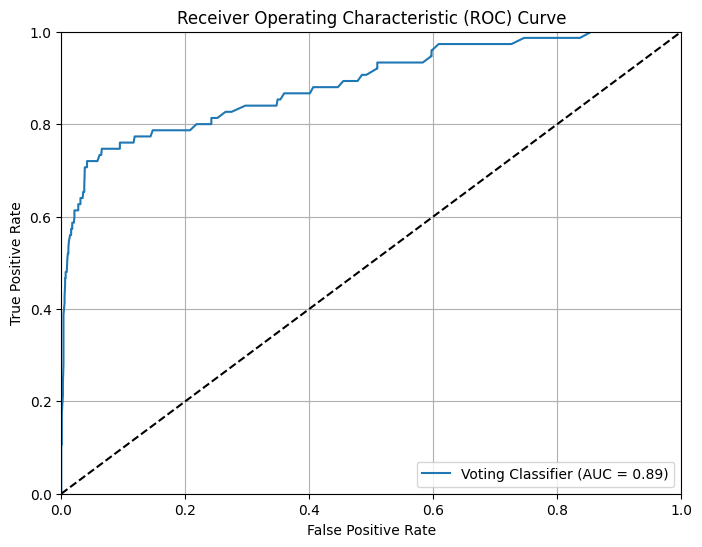

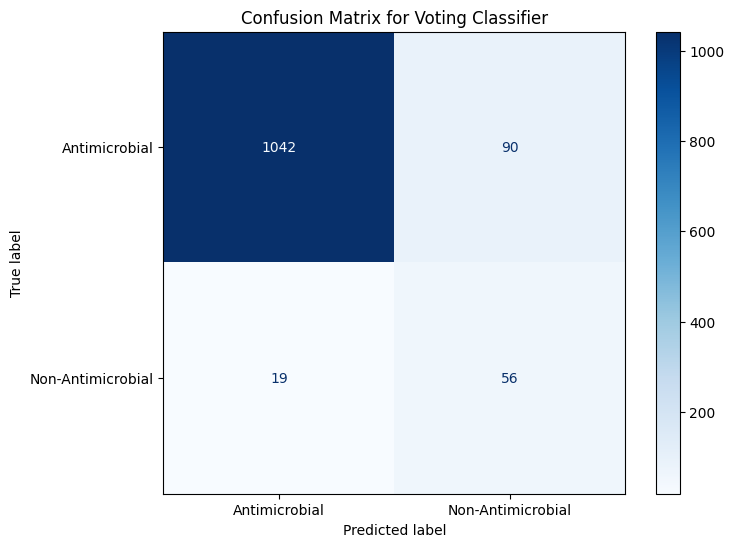

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Standardize the feature set
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)  # Encode training labels
y_test_encoded = le.transform(y_test)  # Encode test labels

# Initialize the base models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf_classifier = RandomForestClassifier(random_state=42)

# Create the Voting Classifier with weights
voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', log_reg),
    ('random_forest', rf_classifier)
], voting='soft', weights=[1, 2])  # Adjust weights as necessary

# Train the Voting Classifier
voting_classifier.fit(X_resampled, y_resampled_encoded)

# Predict on the test set
y_pred = voting_classifier.predict(X_test)
y_pred_proba = voting_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for positive class

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot ROC Curve for Voting Classifier
plot_roc_curve(y_test_encoded, y_pred_proba, 'Voting Classifier')
# Plot Confusion Matrix for Voting Classifier
plot_confusion_matrix(y_test_encoded, y_pred, 'Voting Classifier')


**Now trying again with Random Under Sampler method for better accuracy reducing the majority class and increasing the data for minority simultaneously**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Apply SMOTE to the training data to increase Non-Antimicrobial class
smote = SMOTE(sampling_strategy={ 'Non-Antimicrobial': 3500 }, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Apply Random UnderSampling to Antimicrobial class to reduce it to 4000
rus = RandomUnderSampler(sampling_strategy={ 'Antimicrobial': 3500 }, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Check the new class distribution
print(y_resampled.value_counts())


Activity
Antimicrobial        3500
Non-Antimicrobial    3500
Name: count, dtype: int64


**Again checking the value count in each class**

In [ ]:
print(y_resampled.value_counts())

Activity
Antimicrobial        3500
Non-Antimicrobial    3500
Name: count, dtype: int64


**Now implementing using CATBoost for better efficiency**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


**Training the model again using Random Forest, Logistic Regression and CatBoost Classifier**

**Also adding weights to model for better performing for minority class dataset, here 'Non-Antimicrobial'**

In [63]:
from catboost import CatBoostClassifier
# Initialize models with class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
log_reg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6,
                                     class_weights=[1, 5], verbose=0)  # Adjust class_weights as needed

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('log_reg', log_reg_model),
    ('catboost', catboost_model)
], voting='soft')  # Use 'soft' for probability-based voting

# Train Voting Classifier
voting_classifier.fit(X_resampled, y_resampled)

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_rep_voting = classification_report(y_test, y_pred_voting)

print("Model: Voting Classifier")
print(f"Accuracy: {accuracy_voting}")
print("Classification Report:")
print(classification_rep_voting)
print("="*50)

# Optionally, evaluate individual models as well
for model_name, model in zip(['Random Forest', 'Logistic Regression', 'CatBoost'],
                               [rf_model, log_reg_model, catboost_model]):
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model: Voting Classifier
Accuracy: 0.9312344656172328
Classification Report:
                   precision    recall  f1-score   support

    Antimicrobial       0.98      0.95      0.96      1132
Non-Antimicrobial       0.46      0.65      0.54        75

         accuracy                           0.93      1207
        macro avg       0.72      0.80      0.75      1207
     weighted avg       0.94      0.93      0.94      1207



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model: Random Forest
Accuracy: 0.9212924606462303
Classification Report:
                   precision    recall  f1-score   support

    Antimicrobial       0.98      0.93      0.96      1132
Non-Antimicrobial       0.42      0.75      0.54        75

         accuracy                           0.92      1207
        macro avg       0.70      0.84      0.75      1207
     weighted avg       0.95      0.92      0.93      1207



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model: Logistic Regression
Accuracy: 0.8127589063794531
Classification Report:
                   precision    recall  f1-score   support

    Antimicrobial       0.97      0.83      0.89      1132
Non-Antimicrobial       0.19      0.61      0.29        75

         accuracy                           0.81      1207
        macro avg       0.58      0.72      0.59      1207
     weighted avg       0.92      0.81      0.85      1207

Model: CatBoost
Accuracy: 0.9138359569179785
Classification Report:
                   precision    recall  f1-score   support

    Antimicrobial       0.98      0.93      0.95      1132
Non-Antimicrobial       0.40      0.73      0.51        75

         accuracy                           0.91      1207
        macro avg       0.69      0.83      0.73      1207
     weighted avg       0.94      0.91      0.93      1207



**MODEL EVALUATION and the ROC Curve and Confusion Matrix of the model**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model: Voting Classifier
Accuracy: 0.9312344656172328
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1132
           1       0.46      0.65      0.54        75

    accuracy                           0.93      1207
   macro avg       0.72      0.80      0.75      1207
weighted avg       0.94      0.93      0.94      1207



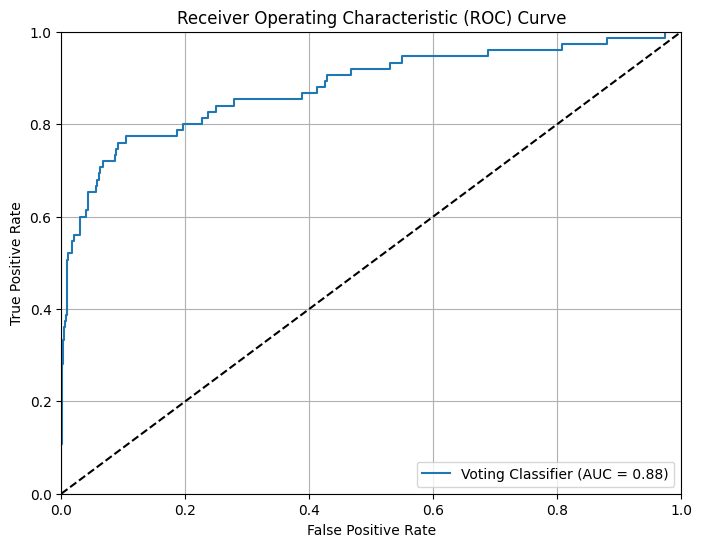

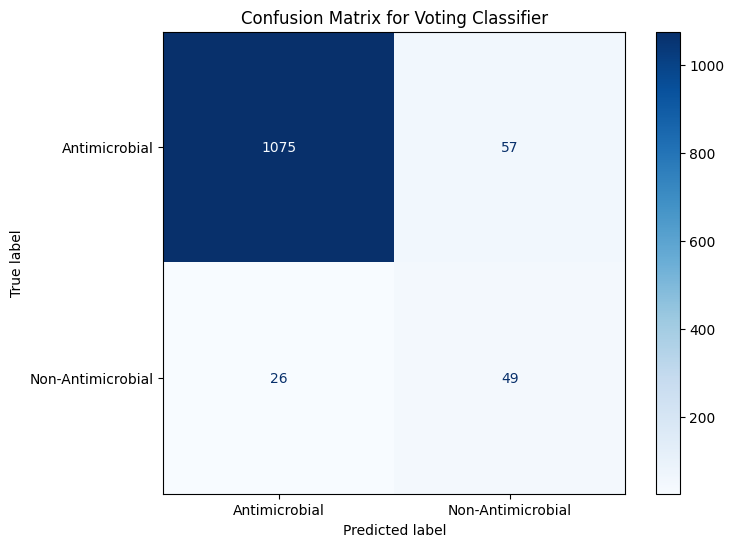

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


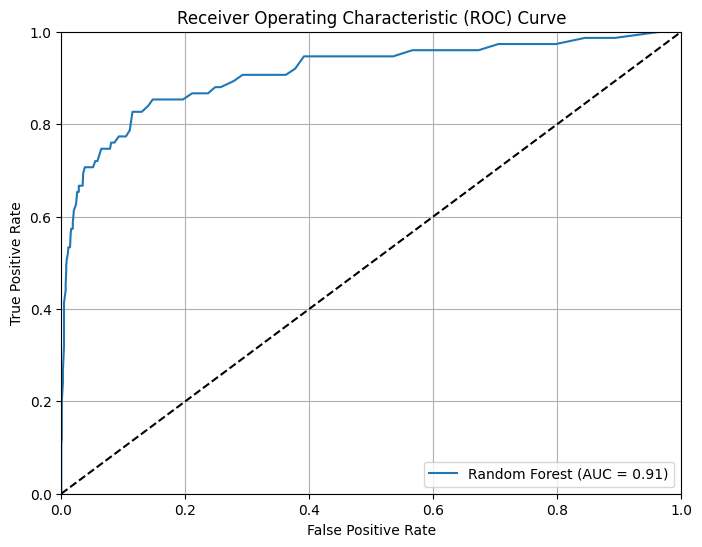

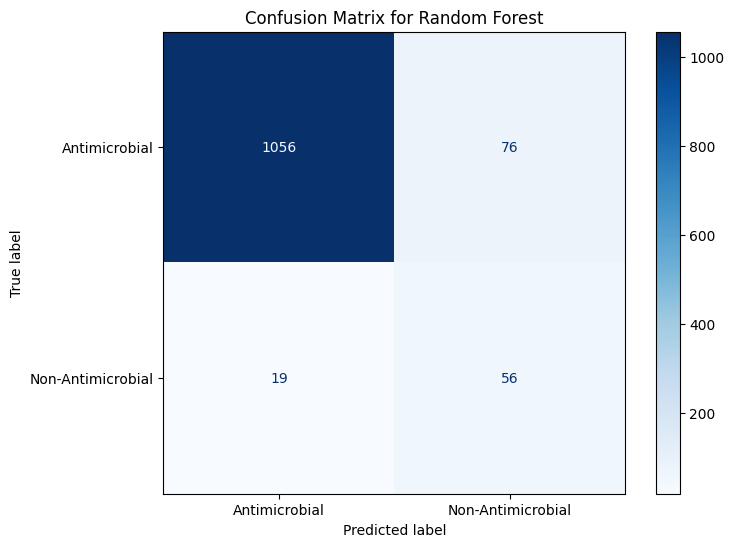

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


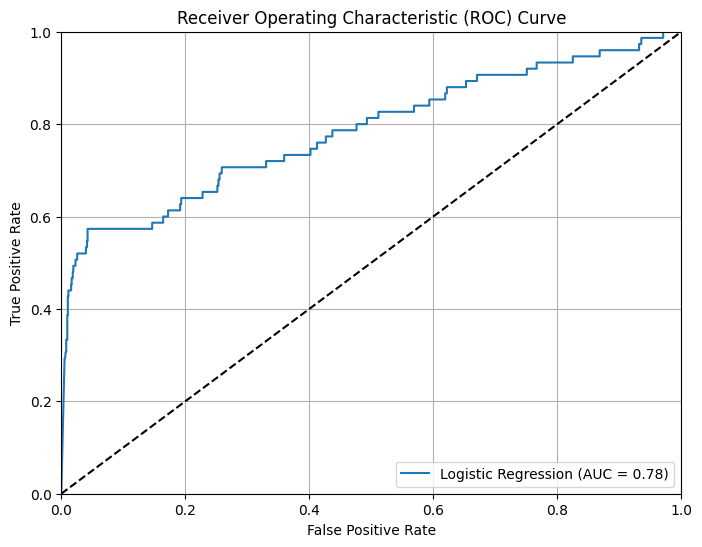

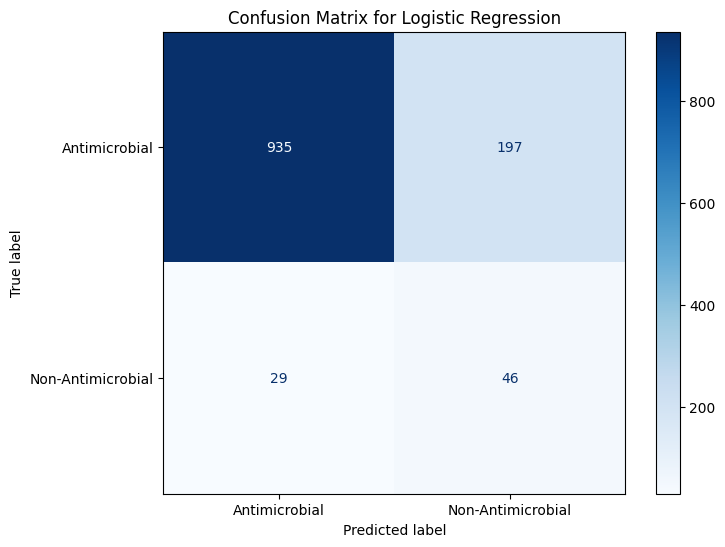

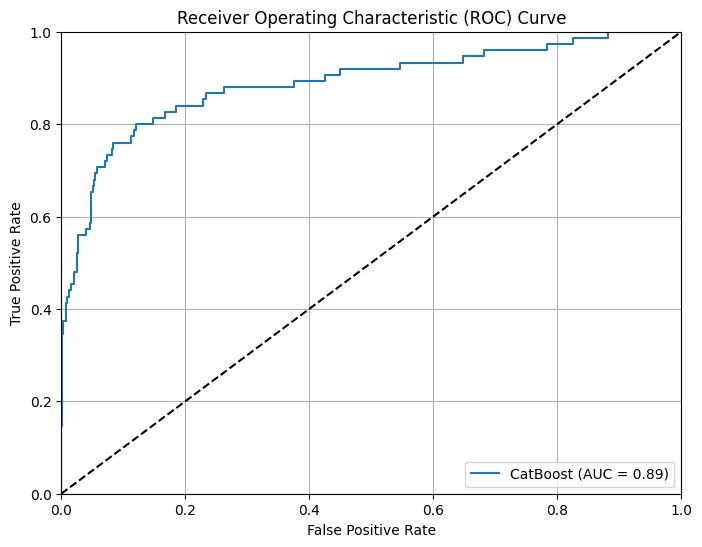

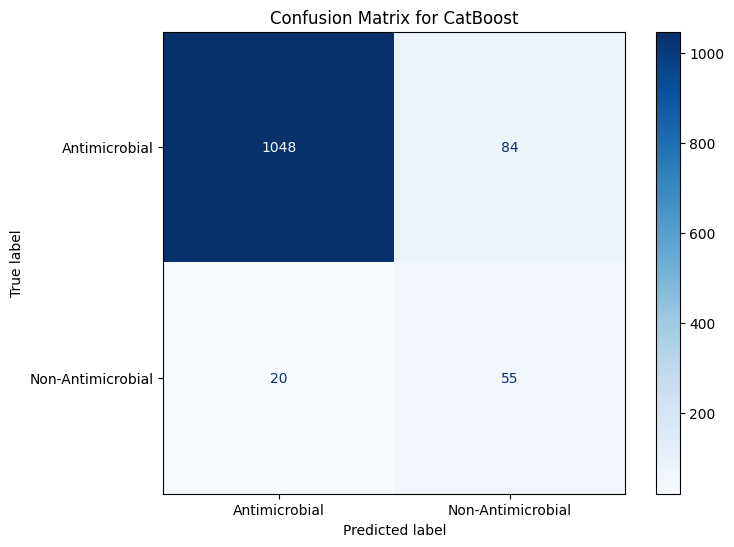

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)  # Encode training labels
y_test_encoded = le.transform(y_test)  # Encode test labels

# Fit models using encoded labels
rf_model.fit(X_resampled, y_resampled_encoded)
log_reg_model.fit(X_resampled, y_resampled_encoded)
catboost_model.fit(X_resampled, y_resampled_encoded)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('log_reg', log_reg_model),
    ('catboost', catboost_model)
], voting='soft')  # Use 'soft' for probability-based voting

# Train Voting Classifier
voting_classifier.fit(X_resampled, y_resampled_encoded)

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)
y_pred_proba_voting = voting_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for positive class

# Evaluate Voting Classifier
accuracy_voting = accuracy_score(y_test_encoded, y_pred_voting)
classification_rep_voting = classification_report(y_test_encoded, y_pred_voting)

print("Model: Voting Classifier")
print(f"Accuracy: {accuracy_voting}")
print("Classification Report:")
print(classification_rep_voting)
print("="*50)

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# ROC Curve for Voting Classifier
plot_roc_curve(y_test_encoded, y_pred_proba_voting, 'Voting Classifier')
# Confusion Matrix for Voting Classifier
plot_confusion_matrix(y_test_encoded, y_pred_voting, 'Voting Classifier')

# Optionally, evaluate individual models as well
for model_name, model in zip(['Random Forest', 'Logistic Regression', 'CatBoost'],
                               [rf_model, log_reg_model, catboost_model]):
    # Get predictions and probabilities
    model.fit(X_resampled, y_resampled_encoded)  # Fit the model with encoded labels
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class

    # ROC Curve
    plot_roc_curve(y_test_encoded, y_pred_proba, model_name)
    # Confusion Matrix
    plot_confusion_matrix(y_test_encoded, y_pred, model_name)


**Reducing the majority class equal to the minority class**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the undersampler
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after undersampling:")
print(y_resampled.value_counts())


Class distribution after undersampling:
Activity
Antimicrobial        332
Non-Antimicrobial    332
Name: count, dtype: int64


In [ ]:
print(y_resampled.value_counts())

Activity
Antimicrobial        332
Non-Antimicrobial    332
Name: count, dtype: int64


**Again training the model with the new values of the target class**

In [ ]:
from catboost import CatBoostClassifier
# Initialize models with class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
log_reg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6,
                                     class_weights=[1, 5], verbose=0)  # Adjust class_weights as needed

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('log_reg', log_reg_model),
    ('catboost', catboost_model)
], voting='soft')  # Use 'soft' for probability-based voting

# Train Voting Classifier
voting_classifier.fit(X_resampled, y_resampled)

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_rep_voting = classification_report(y_test, y_pred_voting)

print("Model: Voting Classifier")
print(f"Accuracy: {accuracy_voting}")
print("Classification Report:")
print(classification_rep_voting)
print("="*50)

# Optionally, evaluate individual models as well
for model_name, model in zip(['Random Forest', 'Logistic Regression', 'CatBoost'],
                               [rf_model, log_reg_model, catboost_model]):
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model: Voting Classifier
Accuracy: 0.8525269262634632
Classification Report:
                   precision    recall  f1-score   support

    Antimicrobial       0.99      0.85      0.92      1132
Non-Antimicrobial       0.28      0.84      0.41        75

         accuracy                           0.85      1207
        macro avg       0.63      0.85      0.67      1207
     weighted avg       0.94      0.85      0.88      1207



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model: Random Forest
Accuracy: 0.8458989229494615
Classification Report:
                   precision    recall  f1-score   support

    Antimicrobial       0.99      0.84      0.91      1132
Non-Antimicrobial       0.27      0.88      0.42        75

         accuracy                           0.85      1207
        macro avg       0.63      0.86      0.66      1207
     weighted avg       0.95      0.85      0.88      1207



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model: Logistic Regression
Accuracy: 0.8392709196354599
Classification Report:
                   precision    recall  f1-score   support

    Antimicrobial       0.99      0.84      0.91      1132
Non-Antimicrobial       0.26      0.83      0.39        75

         accuracy                           0.84      1207
        macro avg       0.62      0.83      0.65      1207
     weighted avg       0.94      0.84      0.88      1207

Model: CatBoost
Accuracy: 0.7953603976801988
Classification Report:
                   precision    recall  f1-score   support

    Antimicrobial       0.99      0.79      0.88      1132
Non-Antimicrobial       0.21      0.85      0.34        75

         accuracy                           0.80      1207
        macro avg       0.60      0.82      0.61      1207
     weighted avg       0.94      0.80      0.85      1207



**MODEL EVALUATION and the ROC Curve and Confusion Matrix of the model**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


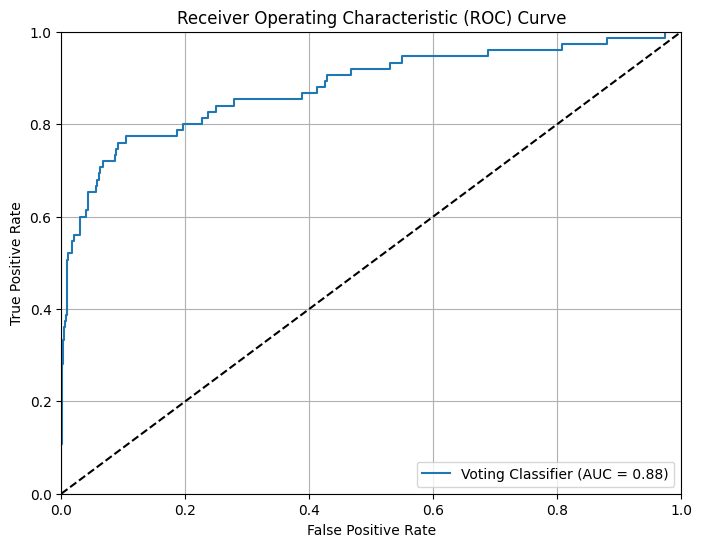

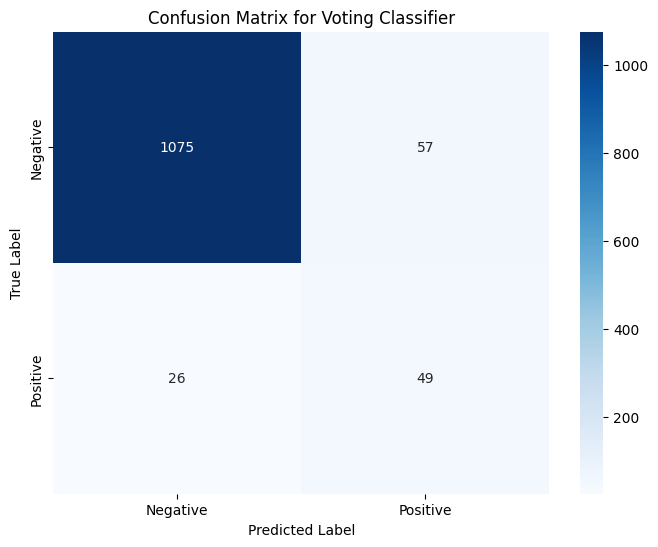

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


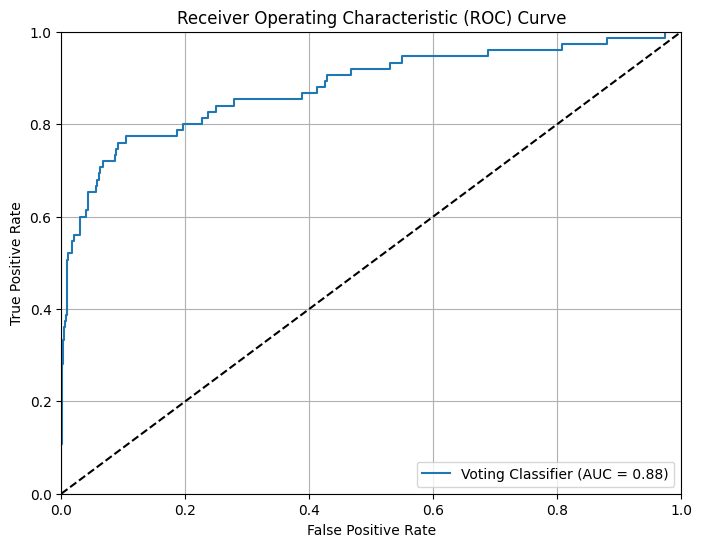

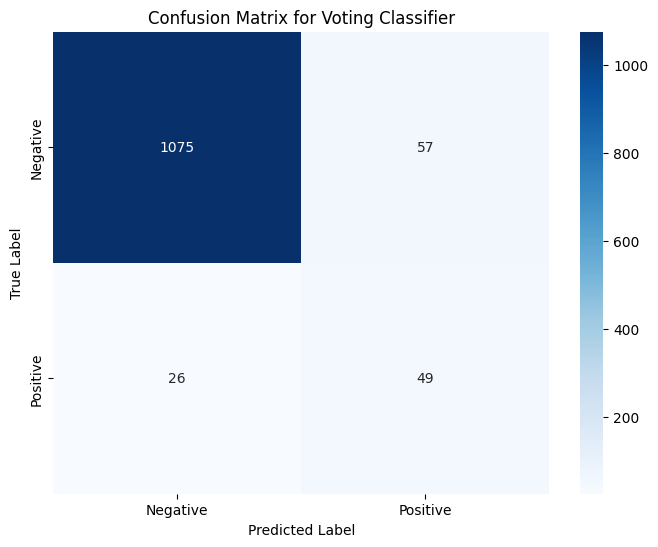

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


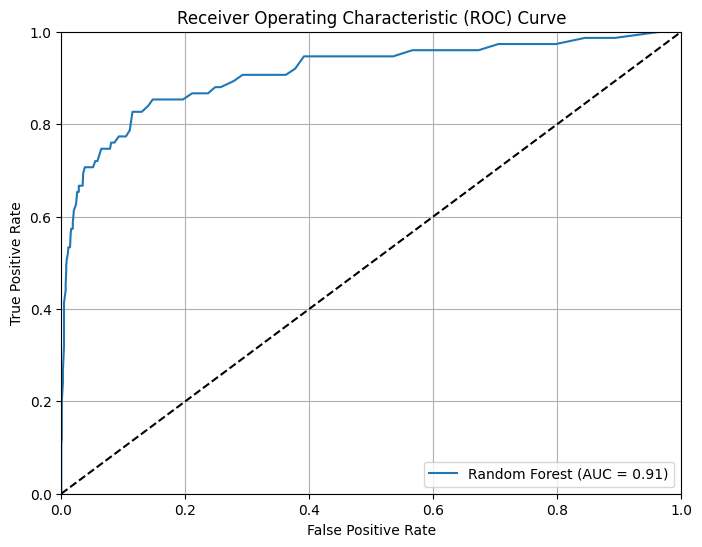

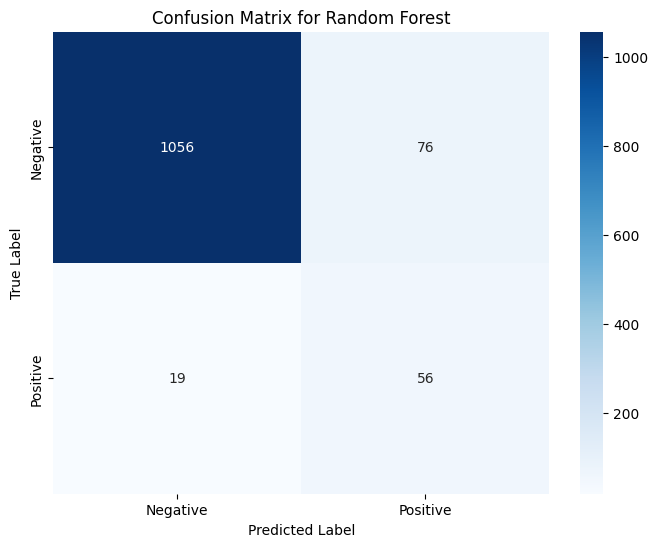

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


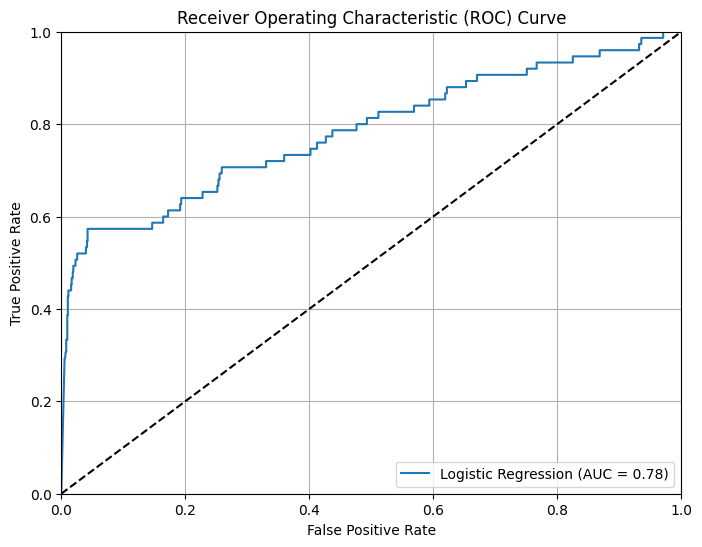

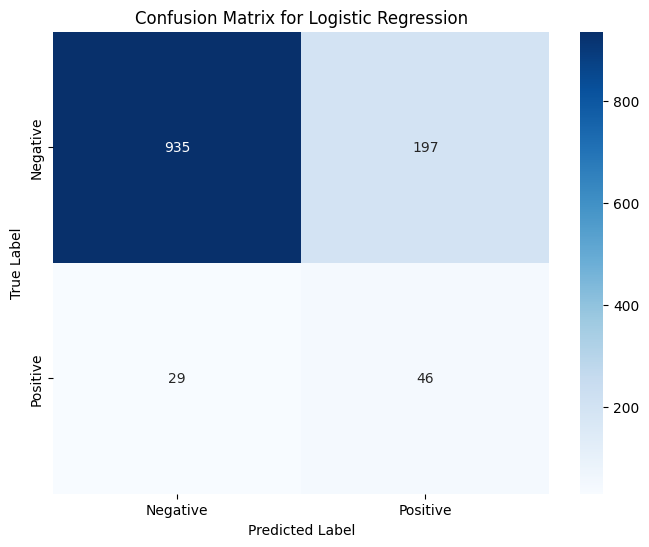

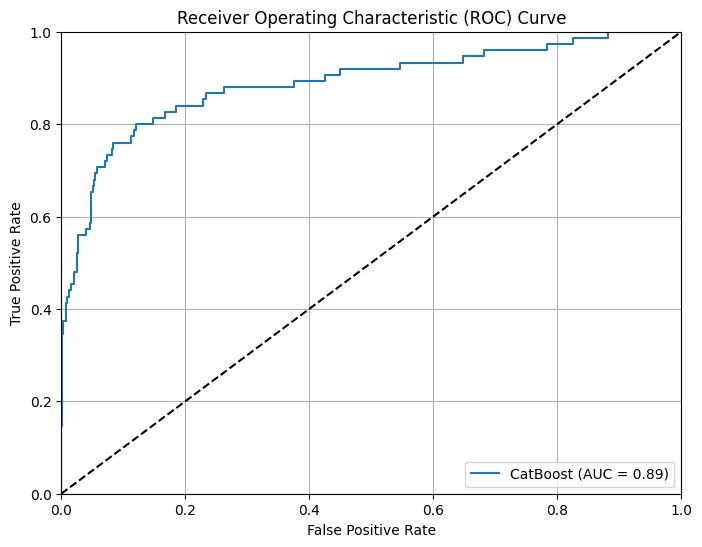

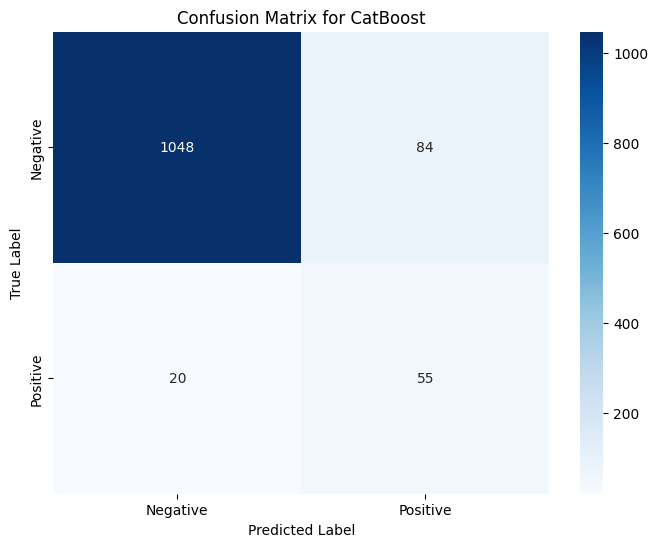

In [62]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_resampled)  # Encode training labels
y_test_encoded = le.transform(y_test)  # Encode test labels

# Fit models using encoded labels
rf_model.fit(X_resampled, y_train_encoded)
log_reg_model.fit(X_resampled, y_train_encoded)
catboost_model.fit(X_resampled, y_train_encoded)

# Create the Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('log_reg', log_reg_model),
    ('catboost', catboost_model)
], voting='soft')  # Use 'soft' for probability-based voting

# Train Voting Classifier
voting_classifier.fit(X_resampled, y_train_encoded)

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)
y_pred_proba_voting = voting_classifier.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Function to plot ROC Curve (updated to handle label encoding)
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Confusion Matrix function remains the same

# ROC Curve for Voting Classifier
plot_roc_curve(y_test_encoded, y_pred_proba_voting, 'Voting Classifier')
# Confusion Matrix for Voting Classifier
plot_confusion_matrix(y_test_encoded, y_pred_voting, 'Voting Classifier')

# Evaluate individual models
models = [('Voting Classifier', voting_classifier),
          ('Random Forest', rf_model),
          ('Logistic Regression', log_reg_model),
          ('CatBoost', catboost_model)]

for model_name, model in models:
    # Get predictions and probabilities
    if model_name == 'Voting Classifier':
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

    # ROC Curve
    plot_roc_curve(y_test_encoded, y_pred_proba, model_name)
    # Confusion Matrix
    plot_confusion_matrix(y_test_encoded, y_pred, model_name)


**Since undersmapling did not provide good results with overfitting again reducing the majority class and increasing the minority class to 3000 values each**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Apply SMOTE to the training data to increase Non-Antimicrobial class
smote = SMOTE(sampling_strategy={ 'Non-Antimicrobial': 3000 }, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Apply Random UnderSampling to Antimicrobial class to reduce it to 4000
rus = RandomUnderSampler(sampling_strategy={ 'Antimicrobial': 3000 }, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Check the new class distribution
print(y_resampled.value_counts())


Activity
Antimicrobial        3000
Non-Antimicrobial    3000
Name: count, dtype: int64


**Some data visualization after changing the data values**

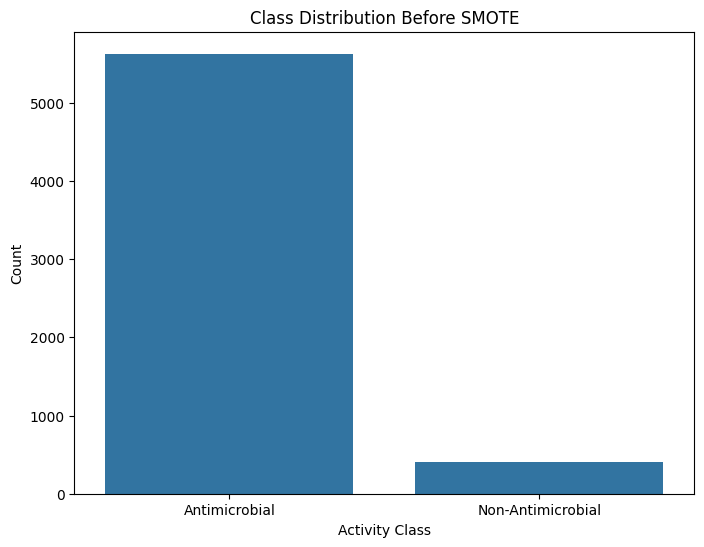

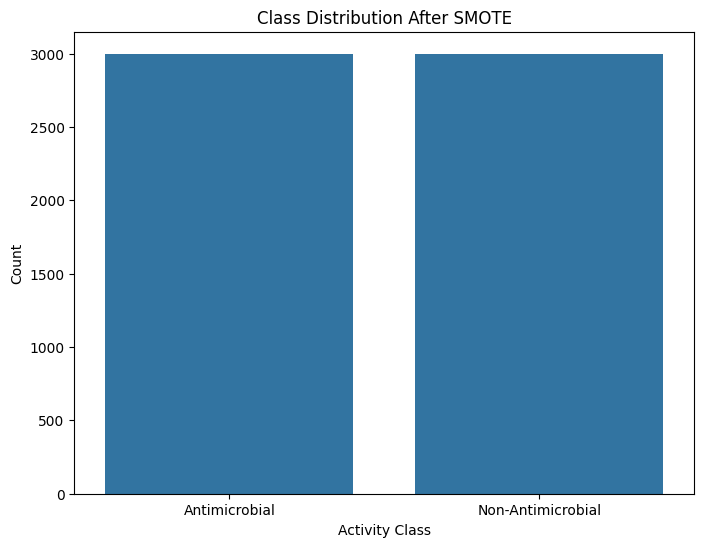

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Activity Class')
plt.ylabel('Count')
plt.show()

# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Activity Class')
plt.ylabel('Count')
plt.show()


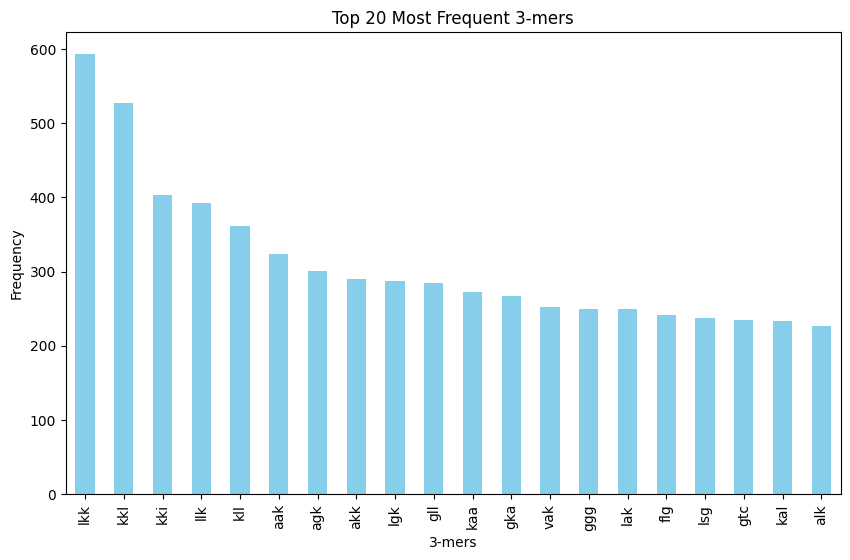

In [ ]:
# Get the sum of occurrences of each k-mer
kmers_freq = kmers_df.sum(axis=0).sort_values(ascending=False)

# Plot top 20 most frequent k-mers
plt.figure(figsize=(10, 6))
kmers_freq[:20].plot(kind='bar', color='skyblue')
plt.title(f'Top 20 Most Frequent {k}-mers')
plt.xlabel(f'{k}-mers')
plt.ylabel('Frequency')
plt.show()


********************************************************************THE END*****************************

**HYPERPARAMETER TUNING OF THE MODEL**

In [ ]:
!pip install bayesian-optimization


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_resampled and y_resampled are the full-sized training dataset

# Step 1: Define Bayesian Optimization functions

# Random Forest Optimization
def rf_evaluate(n_estimators, max_depth, min_samples_split):
    rf = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        class_weight='balanced',
        random_state=42
    )
    scores = cross_val_score(rf, X_resampled, y_resampled, cv=3, scoring='f1_weighted')  # Keep cv=3 for speed
    return scores.mean()

# CatBoost Optimization with early stopping
def catboost_evaluate(iterations, learning_rate, depth):
    catboost = CatBoostClassifier(
        iterations=int(iterations),
        learning_rate=learning_rate,
        depth=int(depth),
        early_stopping_rounds=50,  # Early stopping to reduce unnecessary iterations
        verbose=0
    )
    scores = cross_val_score(catboost, X_resampled, y_resampled, cv=3, scoring='f1_weighted')
    return scores.mean()

# Step 2: Define the parameter bounds for optimization
rf_bounds = {
    'n_estimators': (50, 150),  # Reduced range for faster search
    'max_depth': (5, 15),
    'min_samples_split': (2, 8)
}

catboost_bounds = {
    'iterations': (100, 500),  # Limited range for iterations
    'learning_rate': (0.05, 0.2),  # Focus on a smaller range
    'depth': (3, 8)  # Reduced depth for faster training
}

# Step 3: Perform Bayesian Optimization for Random Forest
rf_optimizer = BayesianOptimization(f=rf_evaluate, pbounds=rf_bounds, random_state=42)
rf_optimizer.maximize(init_points=3, n_iter=5)  # Fewer initial points and iterations

# Step 4: Get the best parameters for Random Forest
best_rf_params = rf_optimizer.max['params']
print("Best parameters for Random Forest: ", best_rf_params)

# Step 5: Train Random Forest with best parameters
rf_model = RandomForestClassifier(
    n_estimators=int(best_rf_params['n_estimators']),
    max_depth=int(best_rf_params['max_depth']),
    min_samples_split=int(best_rf_params['min_samples_split']),
    class_weight='balanced',
    random_state=42
)

# Step 6: Perform Bayesian Optimization for CatBoost
catboost_optimizer = BayesianOptimization(f=catboost_evaluate, pbounds=catboost_bounds, random_state=42)
catboost_optimizer.maximize(init_points=3, n_iter=5)  # Reduced iterations for speed

# Step 7: Get the best parameters for CatBoost
best_catboost_params = catboost_optimizer.max['params']
print("Best parameters for CatBoost: ", best_catboost_params)

# Step 8: Train CatBoost with best parameters
catboost_model = CatBoostClassifier(
    iterations=int(best_catboost_params['iterations']),
    learning_rate=best_catboost_params['learning_rate'],
    depth=int(best_catboost_params['depth']),
    early_stopping_rounds=50,
    verbose=0
)

# Step 9: Create the Voting Classifier
voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('svm', SVC(class_weight='balanced', probability=True, random_state=42)),  # SVM kept as-is
        ('catboost', catboost_model)
    ],
    voting='soft'
)

# Step 10: Train the Voting Classifier
voting_model.fit(X_resampled, y_resampled)

# Step 11: Evaluate the model
y_pred = voting_model.predict(X_test)

# Step 12: Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.8801    | 8.745     | 7.704     | 123.2     |
| 2         | 0.8817    | 10.99     | 2.936     | 65.6      |
| 3         | 0.8019    | 5.581     | 7.197     | 110.1     |
| 4         | 0.8808    | 8.767     | 7.284     | 122.9     |
| 5         | 0.913     | 15.0      | 2.0       | 129.2     |
| 6         | 0.9045    | 12.19     | 2.0       | 141.2     |
| 7         | 0.8063    | 5.0       | 8.0       | 150.0     |
| 8         | 0.8281    | 5.889     | 2.0       | 132.7     |
Best parameters for Random Forest:  {'max_depth': 15.0, 'min_samples_split': 2.0, 'n_estimators': 129.1694153209643}
|   iter    |  target   |   depth   | iterat... | learni... |
-------------------------------------------------------------
| 1         | 0.9459    | 4.873     | 480.3     | 0.1598    |
| 2         | 0.9278    | 5.993     | 162.4     | 0.0734    |
| 3         | 0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9652
Classification Report:
                   precision    recall  f1-score   support

    Antimicrobial       0.97      0.99      0.98      1132
Non-Antimicrobial       0.87      0.52      0.65        75

         accuracy                           0.97      1207
        macro avg       0.92      0.76      0.82      1207
     weighted avg       0.96      0.97      0.96      1207



In [ ]:
print(df.columns)

Index(['Sequence', 'Sequence_Length', 'Source', 'Activity',
       'Protein_existence', 'Target_Organism', 'Hemolytic_activity',
       'Linear/Cyclic/Branched', 'Stereochemistry'],
      dtype='object')


In [ ]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
print(y_resampled.value_counts())

Activity
Antimicrobial        3000
Non-Antimicrobial    3000
Name: count, dtype: int64


In [ ]:
non_antimicrobial_rows = df[df['Activity'] == 'Non-antimicrobial']

# Display the result
print(non_antimicrobial_rows)

Empty DataFrame
Columns: [Sequence, Sequence_Length, Source, Activity, Protein_existence, Target_Organism, Hemolytic_activity, Linear/Cyclic/Branched, Stereochemistry]
Index: []


In [ ]:
print(df[df['Activity']=='Non-Antimicrobial'].value_counts())


Sequence                                        Sequence_Length  Source                                                                                Activity           Protein_existence  Target_Organism                                                Hemolytic_activity                                                                  Linear/Cyclic/Branched  Stereochemistry 
GLPWGCPSDIPGWNTPWAC                             19               streptomyces sp. (dsm 14996)                                                          Non-Antimicrobial  protein level      no mics found in dramp database                                no hemolysis information or data found in the reference(s) presented in this entry  not included yet        not included yet    2
ACDTATCVTHRLAGLLSRSGGVVKNNFVPTNVGSKAF           37               homo sapiens (human)                                                                  Non-Antimicrobial  not found          no mics found in dramp database                     

In [ ]:
# Display all rows with Non-Antimicrobial activity
non_antimicrobial_rows = df[df['Activity'] == 'Non-Antimicrobial']
print(non_antimicrobial_rows)


                                   Sequence  Sequence_Length  \
693      CHTNGGYCVRAICPPSARRPGSCFPEKNPCCKYM               34   
935                         GFGSKPIDSFGLSWL               15   
1310                            EDGLHPRLCSC               11   
1346  ITPLATLATPEATPVGFAATSATAAAVNMITHDVTRH               37   
1348                       GNWHGTAPDWFFNYYW               16   
...                                     ...              ...   
5152                   VLDKVLEELGKVSRKIAVGI               20   
5156                   PDRAIDTYRTSPVADQRYNA               20   
5826                       GLFAVIKKVASVIKGL               16   
5827          IKLSKKTKKNLKKVLKGAIKGAIAVAKMV               29   
6033         GLPTCGETCFGGTCNTPGCTCDPWPVCTHN               30   

                             Source           Activity Protein_existence  \
693                    mus musculus  Non-Antimicrobial     protein level   
935   a marine streptomyces species  Non-Antimicrobial     protein level   
131

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming the VotingClassifier model is already trained and available as `voting_model`

def predict_antimicrobial(sequence):
    # Create a DataFrame for the new input
    input_data = pd.DataFrame({
        'Sequence': [sequence],
        'Sequence_Length': [len(sequence)],  # Calculate sequence length
        'Source': ['unknown'],  # Default value for unknown source
        'Protein_existence': ['unknown'],  # Default value for unknown existence
        'Target_Organism': ['unknown'],  # Default value for unknown organism
        'Hemolytic_activity': ['unknown'],  # Default value for unknown hemolytic activity
        'Linear/Cyclic/Branched': ['unknown'],  # Default value for unknown structure
        'Stereochemistry': ['unknown']  # Default value for unknown stereochemistry
    })

    # Convert 'Sequence' to k-mer representation
    k = 3  # k value used during training
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(k, k))
    input_kmers = vectorizer.fit_transform(input_data['Sequence']).toarray()

    # Create a DataFrame from k-mer features
    kmers_df = pd.DataFrame(input_kmers, columns=vectorizer.get_feature_names_out())

    # Combine k-mer features with other features
    input_combined = pd.concat([kmers_df, input_data[['Sequence_Length', 'Source',
                                                       'Protein_existence',
                                                       'Target_Organism',
                                                       'Hemolytic_activity',
                                                       'Linear/Cyclic/Branched',
                                                       'Stereochemistry']].reset_index(drop=True)], axis=1)

    # Encode categorical variables (use the same approach as training)
    input_encoded = pd.get_dummies(input_combined, columns=['Source', 'Protein_existence',
                                                             'Target_Organism',
                                                             'Hemolytic_activity',
                                                             'Linear/Cyclic/Branched',
                                                             'Stereochemistry'], drop_first=True)

    # Align input data with the training data
    input_encoded = input_encoded.reindex(columns=X_resampled.columns, fill_value=0)

    # Make predictions
    prediction = voting_model.predict(input_encoded)
    return prediction[0]  # Return the prediction result

# Example usage
user_input_sequence = input("Enter the sequence: ")
result = predict_antimicrobial(user_input_sequence)
print(f"The prediction for the given sequence is: {'Antimicrobial' if result == 'Antimicrobial' else 'Non-Antimicrobial'}")


Enter the sequence: GLPWGCPSDIPGWNTPWAC
The prediction for the given sequence is: Antimicrobial


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming the VotingClassifier model is already trained and available as `voting_model`

def predict_antimicrobial(sequence):
    # Create a DataFrame for the new input
    input_data = pd.DataFrame({
        'Sequence': [sequence],
        'Sequence_Length': [len(sequence)],  # Calculate sequence length
        'Source': ['unknown'],  # Default value for unknown source
        'Protein_existence': ['unknown'],  # Default value for unknown existence
        'Target_Organism': ['unknown'],  # Default value for unknown organism
        'Hemolytic_activity': ['unknown'],  # Default value for unknown hemolytic activity
        'Linear/Cyclic/Branched': ['unknown'],  # Default value for unknown structure
        'Stereochemistry': ['unknown']  # Default value for unknown stereochemistry
    })

    # Convert 'Sequence' to k-mer representation
    k = 3  # k value used during training
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(k, k))
    input_kmers = vectorizer.fit_transform(input_data['Sequence']).toarray()

    # Create a DataFrame from k-mer features
    kmers_df = pd.DataFrame(input_kmers, columns=vectorizer.get_feature_names_out())

    # Combine k-mer features with other features
    input_combined = pd.concat([kmers_df, input_data[['Sequence_Length', 'Source',
                                                       'Protein_existence',
                                                       'Target_Organism',
                                                       'Hemolytic_activity',
                                                       'Linear/Cyclic/Branched',
                                                       'Stereochemistry']].reset_index(drop=True)], axis=1)

    # Encode categorical variables (use the same approach as training)
    input_encoded = pd.get_dummies(input_combined, columns=['Source', 'Protein_existence',
                                                             'Target_Organism',
                                                             'Hemolytic_activity',
                                                             'Linear/Cyclic/Branched',
                                                             'Stereochemistry'], drop_first=True)

    # Align input data with the training data
    input_encoded = input_encoded.reindex(columns=X_resampled.columns, fill_value=0)

    # Make predictions
    prediction = voting_model.predict(input_encoded)
    return prediction[0]  # Return the prediction result

# Example usage
user_input_sequence = input("Enter the sequence: ")
result = predict_antimicrobial(user_input_sequence)
print(f"The prediction for the given sequence is: {'Antimicrobial' if result == 'Antimicrobial' else 'Non-Antimicrobial'}")


Enter the sequence: KSCCKSTLGRNCYNLCRARGAQKLCANVCRCKLTSGLSCPKDFPK
The prediction for the given sequence is: Non-Antimicrobial


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming the VotingClassifier model is already trained and available as `voting_model`

def predict_antimicrobial(sequence):
    # Create a DataFrame for the new input
    input_data = pd.DataFrame({
        'Sequence': [sequence],
        'Sequence_Length': [len(sequence)],  # Calculate sequence length
        'Source': ['unknown'],  # Default value for unknown source
        'Protein_existence': ['unknown'],  # Default value for unknown existence
        'Target_Organism': ['unknown'],  # Default value for unknown organism
        'Hemolytic_activity': ['unknown'],  # Default value for unknown hemolytic activity
        'Linear/Cyclic/Branched': ['unknown'],  # Default value for unknown structure
        'Stereochemistry': ['unknown']  # Default value for unknown stereochemistry
    })

    # Convert 'Sequence' to k-mer representation
    k = 3  # k value used during training
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(k, k))
    input_kmers = vectorizer.fit_transform(input_data['Sequence']).toarray()

    # Create a DataFrame from k-mer features
    kmers_df = pd.DataFrame(input_kmers, columns=vectorizer.get_feature_names_out())

    # Combine k-mer features with other features
    input_combined = pd.concat([kmers_df, input_data[['Sequence_Length', 'Source',
                                                       'Protein_existence',
                                                       'Target_Organism',
                                                       'Hemolytic_activity',
                                                       'Linear/Cyclic/Branched',
                                                       'Stereochemistry']].reset_index(drop=True)], axis=1)

    # Encode categorical variables (use the same approach as training)
    input_encoded = pd.get_dummies(input_combined, columns=['Source', 'Protein_existence',
                                                             'Target_Organism',
                                                             'Hemolytic_activity',
                                                             'Linear/Cyclic/Branched',
                                                             'Stereochemistry'], drop_first=True)

    # Align input data with the training data
    input_encoded = input_encoded.reindex(columns=X_resampled.columns, fill_value=0)

    # Make predictions
    prediction = voting_model.predict(input_encoded)
    return prediction[0]  # Return the prediction result

# Example usage
user_input_sequence = input("Enter the sequence: ")
result = predict_antimicrobial(user_input_sequence)
print(f"The prediction for the given sequence is: {'Antimicrobial' if result == 'Antimicrobial' else 'Non-Antimicrobial'}")


Enter the sequence: GILDIAKKLVGGIRNVLGI
The prediction for the given sequence is: Antimicrobial


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming the VotingClassifier model is already trained and available as `voting_model`

def predict_antimicrobial(sequence):
    # Create a DataFrame for the new input
    input_data = pd.DataFrame({
        'Sequence': [sequence],
        'Sequence_Length': [len(sequence)],  # Calculate sequence length
        'Source': ['unknown'],  # Default value for unknown source
        'Protein_existence': ['unknown'],  # Default value for unknown existence
        'Target_Organism': ['unknown'],  # Default value for unknown organism
        'Hemolytic_activity': ['unknown'],  # Default value for unknown hemolytic activity
        'Linear/Cyclic/Branched': ['unknown'],  # Default value for unknown structure
        'Stereochemistry': ['unknown']  # Default value for unknown stereochemistry
    })

    # Convert 'Sequence' to k-mer representation
    k = 3  # k value used during training
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(k, k))
    input_kmers = vectorizer.fit_transform(input_data['Sequence']).toarray()

    # Create a DataFrame from k-mer features
    kmers_df = pd.DataFrame(input_kmers, columns=vectorizer.get_feature_names_out())

    # Combine k-mer features with other features
    input_combined = pd.concat([kmers_df, input_data[['Sequence_Length', 'Source',
                                                       'Protein_existence',
                                                       'Target_Organism',
                                                       'Hemolytic_activity',
                                                       'Linear/Cyclic/Branched',
                                                       'Stereochemistry']].reset_index(drop=True)], axis=1)

    # Encode categorical variables (use the same approach as training)
    input_encoded = pd.get_dummies(input_combined, columns=['Source', 'Protein_existence',
                                                             'Target_Organism',
                                                             'Hemolytic_activity',
                                                             'Linear/Cyclic/Branched',
                                                             'Stereochemistry'], drop_first=True)

    # Align input data with the training data
    input_encoded = input_encoded.reindex(columns=X_resampled.columns, fill_value=0)

    # Make predictions
    prediction = voting_model.predict(input_encoded)
    return prediction[0]  # Return the prediction result

# Example usage
user_input_sequence = input("Enter the sequence: ")
result = predict_antimicrobial(user_input_sequence)
print(f"The prediction for the given sequence is: {'Antimicrobial' if result == 'Antimicrobial' else 'Non-Antimicrobial'}")


Enter the sequence: GIGCGESCVWIPCVSAAIGCSCSNKICYRN
The prediction for the given sequence is: Non-Antimicrobial
